In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import sklearn
from sklearn import metrics
import math

In [2]:
start = dt.datetime(2009, 1, 1)
end = dt.datetime(2021, 1, 1)

data = pdr.get_data_yahoo('^DJI', start, end)
data = data.reset_index()
data = data.dropna()
#data1 = data.copy()

[*********************100%***********************]  1 of 1 completed


In [3]:
train_data = data[data['Date']<"2018-01-01"]
test_data = data[data['Date']>="2018-01-01"]

# Data analysis

In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-01-02,8772.250000,9065.280273,8760.780273,9034.690430,9034.690430,213700000
1,2009-01-05,9027.129883,9034.370117,8892.360352,8952.889648,8952.889648,233760000
2,2009-01-06,8954.570312,9088.059570,8940.950195,9015.099609,9015.099609,215410000
3,2009-01-07,8996.940430,8996.940430,8719.919922,8769.700195,8769.700195,266710000
4,2009-01-08,8769.940430,8770.019531,8651.190430,8742.459961,8742.459961,226620000
...,...,...,...,...,...,...,...
3016,2020-12-24,30155.919922,30209.669922,30099.300781,30199.869141,30199.869141,145570000
3017,2020-12-28,30283.230469,30525.560547,30283.230469,30403.970703,30403.970703,302490000
3018,2020-12-29,30492.070312,30588.789062,30274.240234,30335.669922,30335.669922,357610000
3019,2020-12-30,30415.089844,30525.349609,30393.039062,30409.560547,30409.560547,291890000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function matplotlib.pyplot.show(close=None, block=None)>

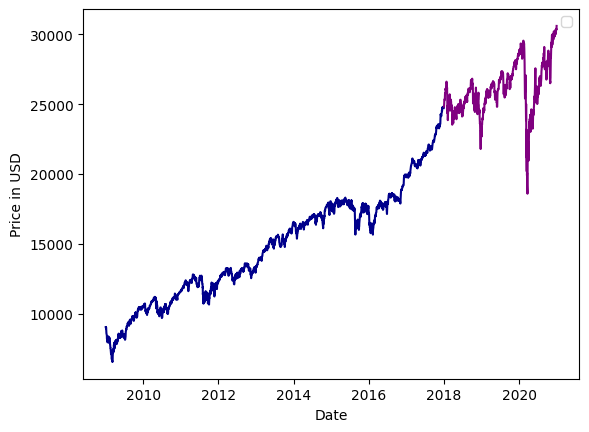

In [5]:
plt.plot(train_data['Date'],train_data['Close'], color ='darkblue')
plt.plot(test_data['Date'],test_data['Close'],color = 'purple')
plt.xlabel('Date')
plt.ylabel('Price in USD')

plt.legend()
plt.show


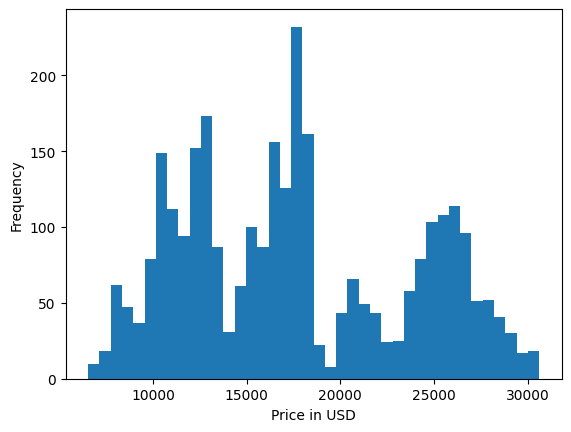

In [6]:
plt.hist(data['Close'],bins = 40)
plt.xlabel('Price in USD')
plt.ylabel('Frequency')
plt.show()

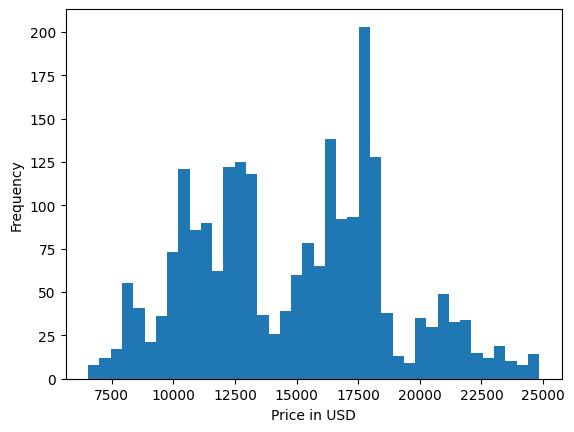

In [7]:
plt.hist(train_data['Close'],bins = 40)
plt.xlabel('Price in USD')
plt.ylabel('Frequency')
plt.show()

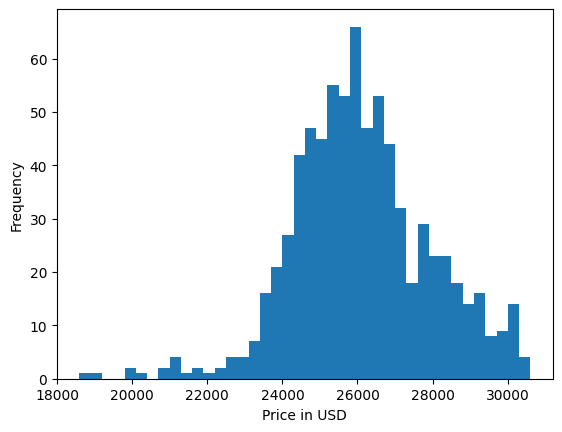

In [8]:
plt.hist(test_data['Close'],bins = 40)
plt.xlabel('Price in USD')
plt.ylabel('Frequency')
plt.show()

In [9]:
adfuller(data['Close'])

(-0.2374306644271012,
 0.933910414810336,
 27,
 2993,
 {'1%': -3.432536741492438,
  '5%': -2.862506160743024,
  '10%': -2.5672843129045173},
 40354.406843980214)

In [10]:
adfuller(train_data['Close'])

(0.7775683223479853,
 0.9912653130447012,
 5,
 2259,
 {'1%': -3.433248072725654,
  '5%': -2.8628202931061955,
  '10%': -2.567451559747925},
 27858.556193600827)

In [11]:
adfuller(test_data['Close'])

(-2.4347580246079366,
 0.13216551805070903,
 9,
 746,
 {'1%': -3.439146171679794,
  '5%': -2.865422101274577,
  '10%': -2.568837245865348},
 10713.676404706486)

In [12]:
### EXAMPLE

#perform augmented Dickey-Fuller test
#adfuller(data)

#(-0.9753836234744063,
# 0.7621363564361013,
# 0,
# 12,
# {'1%': -4.137829282407408,
#  '5%': -3.1549724074074077,
#  '10%': -2.7144769444444443},
# 31.2466098872313)
#Here’s how to interpret the most important values in the output:

#Test statistic: -0.97538
#P-value: 0.7621
#Since the p-value is not less than .05, we fail to reject the null hypothesis.

#This means the time series is non-stationary. In other words, it has some time-dependent structure and does not have constant variance over time.


## För att få bort non-stationarity kan vi differentiera
#df["series"].diff(periods=1)

SyntaxError: invalid character in identifier (1257628345.py, line 12)